# Multivariate Regression - Boston Housing Prices

In [43]:
from sklearn.datasets import load_boston
boston=load_boston()
X=boston.data
Y=boston.target
print(X.shape,Y.shape)

(506, 13) (506,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape)

(404, 13) (102, 13)


# Train our linear regression model

In [46]:
lr=LinearRegression()
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [47]:
lr=LinearRegression(normalize=True)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [48]:
# Step I : Create an object
lr=LinearRegression(normalize=True)
print(lr)

# Step II : Training
lr.fit(X_train,Y_train)

# Step III : Output parameters
print(lr.coef_)
print(lr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
[-1.04415256e-01  4.52575460e-02 -5.95842386e-03  2.36658919e+00
 -1.71718461e+01  3.69808111e+00 -1.11134570e-03 -1.43491202e+00
  2.97366496e-01 -1.22681572e-02 -9.77523914e-01  8.64981284e-03
 -4.87635206e-01]
37.35257668464368


In [37]:
LinearRegression?

# Accuracy of Regression

In [49]:
print("Training score %.4f"%lr.score(X_train,Y_train))
print("Testing score %.4f"%lr.score(X_test,Y_test))

Training score 0.7429
Testing score 0.7229


# Regression - Underfitting Vs Over fitting, Generating Non-Linear Boundaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dfx=pd.read_csv('../Csv Files/weightedX.csv')
dfy=pd.read_csv('../Csv Files/weightedY.csv')

x=dfx.values
y=dfy.values

x=x.reshape((-1,1))
y=y.reshape((-1,1))

X=(x-x.mean())/x.std()
Y=y

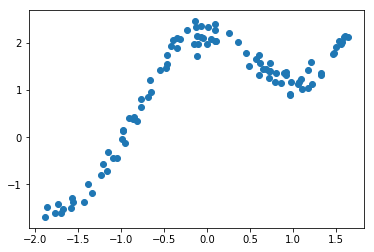

In [3]:
plt.scatter(X,Y)
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# Training

In [59]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Predictions

In [60]:
output=model.predict(X)
# Parameter Learnt
coeff=model.coef_
bias=model.intercept_
print(coeff)
print(bias)

[[0.84167029]]
[1.02986178]


In [61]:
model.score(X,Y)

0.5141377991406518

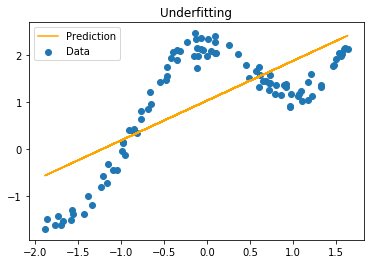

In [64]:
# Visualise
plt.scatter(X,Y,label='Data')
plt.plot(X,output,label='Prediction',color='Orange')
plt.legend()
plt.title('Underfitting')
plt.show()

In [4]:
dfx=pd.read_csv('../Csv Files/weightedX.csv')
dfy=pd.read_csv('../Csv Files/weightedY.csv')

x=dfx.values
y=dfy.values

x=x.reshape((-1,))
y=y.reshape((-1,))

X=(x-x.mean())/x.std()
Y=y

x1=X
x2=x1**2

X=np.stack((x1,x2),axis=1)
print(X.shape)
print(Y.shape)

(99, 2)
(99,)


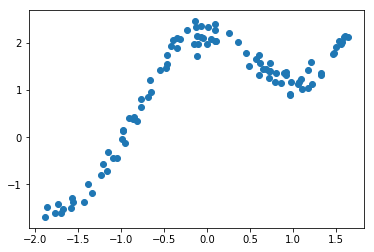

In [5]:
plt.scatter(X[:,0],Y)
plt.show()

[ 0.7605872  -0.68708745]
1.7169492241159656


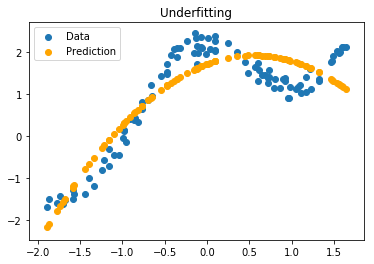

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X,Y)

output=model.predict(X)
# Parameter Learnt
coeff=model.coef_
bias=model.intercept_
print(coeff)
print(bias)

model.score(X,Y)

# Visualise
plt.scatter(X[:,0],Y,label='Data')
plt.scatter(X[:,0],output,label='Prediction',color='Orange')
plt.legend()
plt.title('Underfitting')
plt.show()

# Gradient Descent Variants - Stochastic vs Mini Batch

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Data Processing and Reshaping
from sklearn.datasets import make_regression
x,y = make_regression(n_features=1,n_samples=5000,bias=4,noise=15)

x = x.reshape((-1,))
y = y.reshape((-1,))

print(x.shape,y.shape)

(5000,) (5000,)


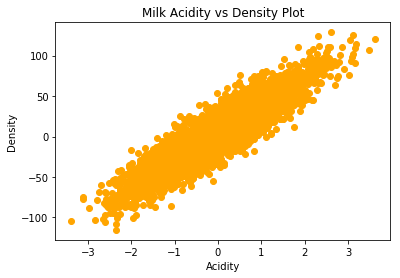

In [11]:
# Normalisation 
#plt.scatter(x,y)
x = (x - x.mean())/x.std()
plt.scatter(x,y,color='orange')
plt.xlabel("Acidity")
plt.ylabel("Density")
plt.title("Milk Acidity vs Density Plot")
plt.show()

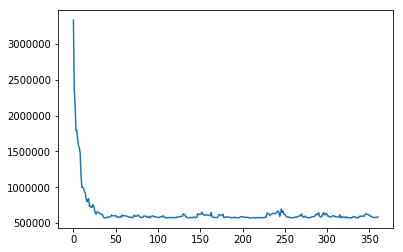

In [15]:
# Linear Regression 
def hypothesis(x,theta):
    return theta[0] + x*theta[1]

def error(X,Y,theta):
    m = Y.shape[0]
    total_e = 0
    
    for i in range(m):
        h = hypothesis(X[i],theta)
        e = (Y[i] - h)**2
        total_e += e
        
    return total_e/2

learning_ratelearning_ratedef gradient(X,Y,theta):
    
    m = Y.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
        
    
    return grad*.5

def batch_gradient(X,Y,theta,batch_size=1):
    
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
    
    return grad*0.5
        
    

def gradientDescent(X,Y,learning_rate=0.1):
    theta = np.zeros((2,))
    
    e = error(X,Y,theta)
    de =e
    error_list = [e]
    itr = 0
    
    while(itr<=400):
        grad = batch_gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta


e,theta = gradientDescent(x,y)

plt.plot(e)
plt.show()

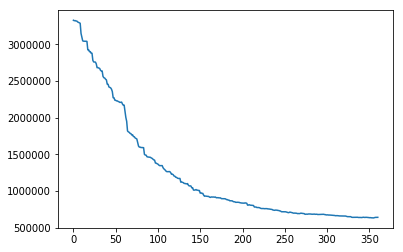

In [16]:
def gradientDescent(X,Y,learning_rate=0.01):
    theta = np.zeros((2,))
    
    e = error(X,Y,theta)
    de =e
    error_list = [e]
    itr = 0
    
    while(itr<=400):
        grad = batch_gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta


e,theta = gradientDescent(x,y)

plt.plot(e)
plt.show()

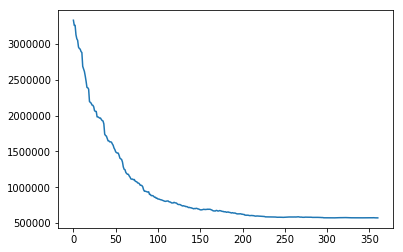

In [18]:
def batch_gradient(X,Y,theta,batch_size=2):
    
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
    
    return grad*0.5
        
    

def gradientDescent(X,Y,learning_rate=0.01):
    theta = np.zeros((2,))
    
    e = error(X,Y,theta)
    de =e
    error_list = [e]
    itr = 0
    
    while(itr<=400):
        grad = batch_gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta


e,theta = gradientDescent(x,y)

plt.plot(e)
plt.show()

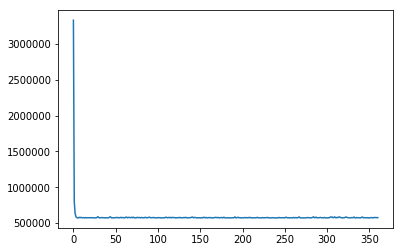

In [19]:
def batch_gradient(X,Y,theta,batch_size=100):
    
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
    
    return grad*0.5
        
    

def gradientDescent(X,Y,learning_rate=0.01):
    theta = np.zeros((2,))
    
    e = error(X,Y,theta)
    de =e
    error_list = [e]
    itr = 0
    
    while(itr<=400):
        grad = batch_gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta


e,theta = gradientDescent(x,y)

plt.plot(e)
plt.show()

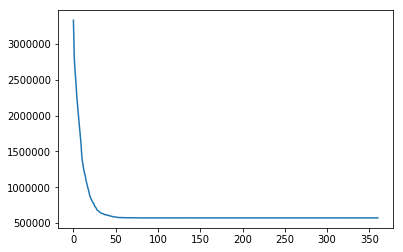

In [20]:
def batch_gradient(X,Y,theta,batch_size=100):
    
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
    
    return grad*0.5
        
    

def gradientDescent(X,Y,learning_rate=0.001):
    theta = np.zeros((2,))
    
    e = error(X,Y,theta)
    de =e
    error_list = [e]
    itr = 0
    
    while(itr<=400):
        grad = batch_gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta


e,theta = gradientDescent(x,y)

plt.plot(e)
plt.show()

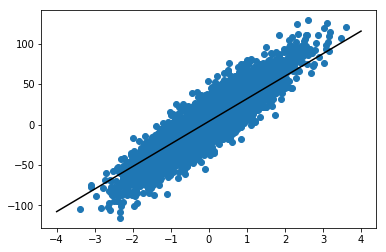

In [14]:
def drawLine(theta):
    x_pts = np.linspace(-4,4,10)
    y_pts = hypothesis(x_pts,theta)

    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')

drawLine(theta)

# K-Fold Cross Validation

In [21]:
from sklearn.datasets import load_boston
boston=load_boston()
X=boston.data
Y=boston.target

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

lr=LinearRegression(normalize=True)
lr.fit(X_train,Y_train)

print("Training score %.4f"%lr.score(X_train,Y_train))
print("Testing score %.4f"%lr.score(X_test,Y_test))

Training score 0.7581
Testing score 0.6413


In [22]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(lr,X_train,Y_train,cv=10,scoring='r2')
print(scores)
print(scores.mean())
print(scores.std())

[0.8312133  0.78287362 0.6295637  0.64968135 0.67094585 0.83969462
 0.81724508 0.84168262 0.62758355 0.59655142]
0.728703511161933
0.09667685618148698


In [24]:
scores=cross_val_score(lr,X_train,Y_train,cv=10,scoring='neg_mean_squared_error')
print(scores)
print(scores.mean())
print(scores.std())

[-11.26934298 -16.22374274 -35.53632688 -31.3808239  -25.99509486
 -15.50719574 -17.07086192 -17.34057237 -21.34206699 -36.85901146]
-22.85250398295124
8.58966574175555
